## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
df_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = df_mouse_study['Mouse ID'].nunique()
total_mice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = df_mouse_study.loc[df_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_rows

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_study[df_mouse_study["Mouse ID"]== 'g989'] 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_mouse_study[df_mouse_study["Mouse ID"].isin(duplicate_rows) == False]

df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
df_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
df_group = df_clean.groupby(["Drug Regimen"])

# mean 
mean_tumor = df_group["Tumor Volume (mm3)"].mean()

# median 
median_tumor = df_group["Tumor Volume (mm3)"].median()

# variance 
variance_tumor = df_group["Tumor Volume (mm3)"].var()

# standard deviation 
std_tumor = df_group["Tumor Volume (mm3)"].std()

# SEM 
sem_tumor = df_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
df_summary = pd.DataFrame({"Mean": mean_tumor, "Median":median_tumor, "Variance":variance_tumor, 
                           "Standard Deviation": std_tumor, "SEM": sem_tumor})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
df_single_summary = df_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
df_single_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# The total number of measurements taken on each drug regimen
total_measurements = df_clean.groupby(["Drug Regimen"]).count()['Mouse ID']
total_measurements

# create x and y axis 
x_axis1 = np.arange(len(total_measurements))
y_axis1 = total_measurements.values


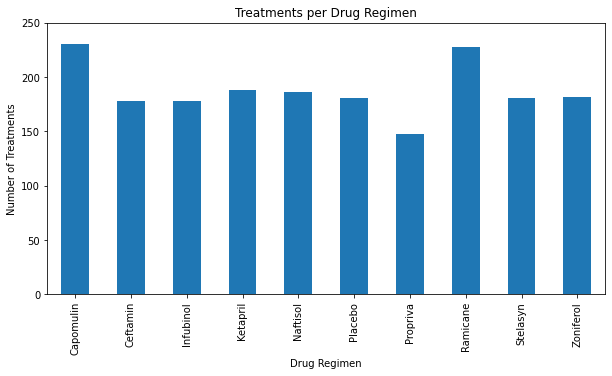

In [11]:
# Generate a bar plot using pandas
total_measurements.plot(figsize = (10, 5), 
                        kind = 'bar',
                        xlim=(-0.75, len(x_axis1)-0.25),
                        ylim=(0, max(y_axis1)+20),
                        title = 'Treatments per Drug Regimen', 
                        xlabel = 'Drug Regimen', 
                        ylabel = 'Number of Treatments');

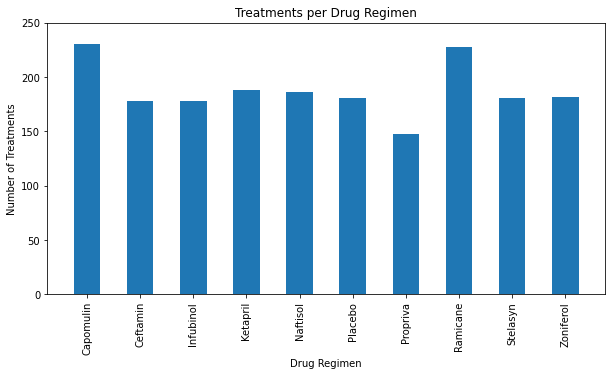

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(x_axis1, y_axis1, width = 0.5);
ax1.set_xticks(x_axis1);
ax1.set_xticklabels(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                    "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical');

ax1.set(xlim=(-0.75, len(x_axis1)-0.25),
       ylim=(0, max(y_axis1)+20),
       title="Treatments per Drug Regimen",
       xlabel="Drug Regimen",
       ylabel="Number of Treatments");


In [13]:
# The distribution of female versus male mice 
gender_dist = df_clean["Sex"].value_counts()

# create labels and values
values_gender_dist = gender_dist.values
labels_gender_dist = gender_dist.index

# set colors and explode
colors = ["blue", "red"]
explode = (0.1, 0)

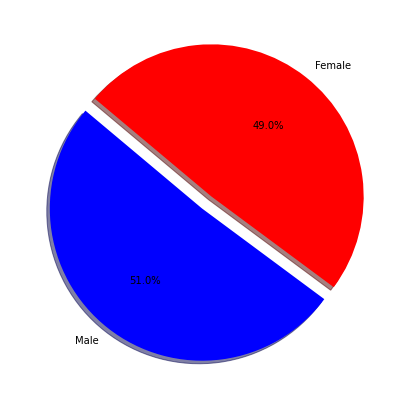

In [14]:
# Generate a pie plot showing using pandas
gender_dist.plot(figsize = (7, 7),
                  ylabel = " ",
                  kind = 'pie', 
                  explode=explode, 
                  colors=colors, 
                  autopct="%1.1f%%", 
                  shadow=True, 
                  startangle=140);

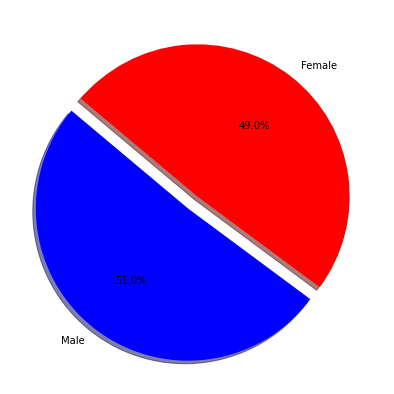

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig2, ax2 = plt.subplots(figsize=(7,7))
ax2.pie(values_gender_dist, 
       explode=explode, 
       labels=labels_gender_dist, 
       colors=colors, 
       autopct="%1.1f%%", 
       shadow=True, 
       startangle=140);


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = df_clean.loc[df_clean['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_time = final_tumor.groupby(final_tumor['Mouse ID']).agg({'Timepoint':['max']})
last_time.columns = ['Timepoint']
last_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_time = last_time.reset_index()
df_last_tumor = pd.merge(last_time, df_clean, how="left", on=["Mouse ID", "Timepoint"])
df_last_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    # add subset 
    vol_final = df_last_tumor['Tumor Volume (mm3)'].loc[df_last_tumor['Drug Regimen'] == treatment] 
    vol_tumor.append(vol_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile r

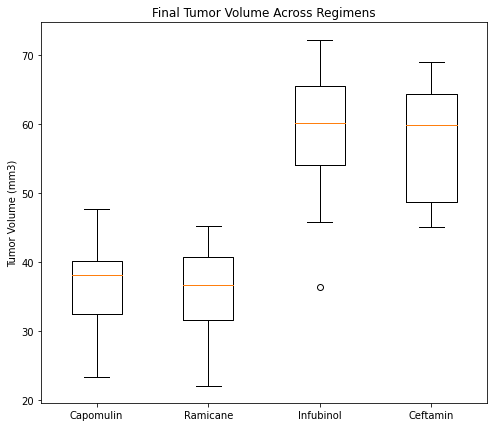

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig3, ax3 = plt.subplots(figsize=(8,7))
ax3.set_title('Final Tumor Volume Across Regimens')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(vol_tumor, labels = treatments)
plt.show()

## Line and Scatter Plots

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

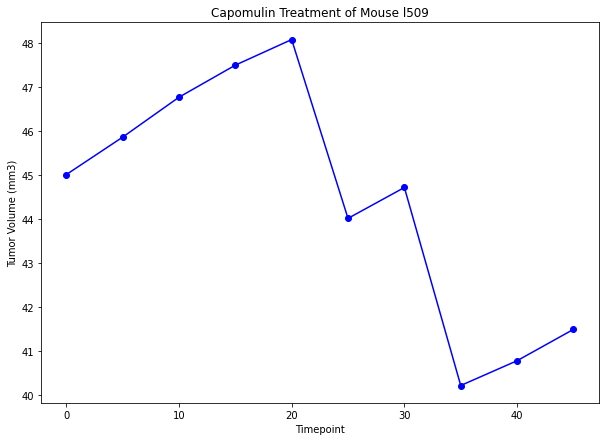

In [57]:
# A mouse treated with Capomulin
capo_mouse = df_clean.loc[df_clean["Mouse ID"] == "l509",:]

# Set axis
x_axis4 = capo_mouse["Timepoint"]
y_axis4 = capo_mouse['Tumor Volume (mm3)']

# Generate a line plot of tumor volume vs. time point
fig4, ax4 = plt.subplots(figsize=(10,7));
ax4.plot(x_axis4, y_axis4, marker="o", color="blue");
ax4.set(xlabel = "Timepoint",
       ylabel = "Tumor Volume (mm3)",
       title = "Capomulin Treatment of Mouse l509",
       xlim = (0, (x_axis4) + 5),
       ylim = (min(y_axis4) - 5, max(y_axis4) + 5));


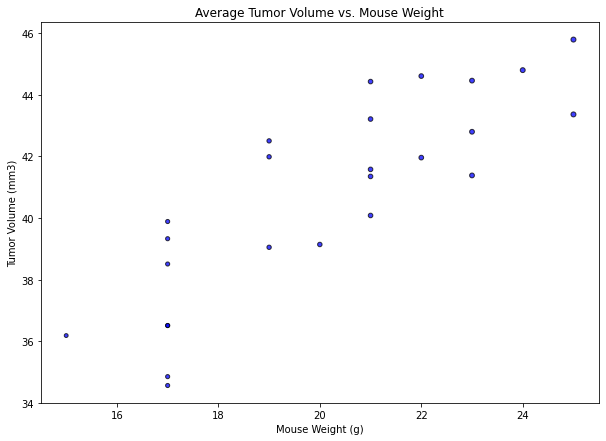

In [52]:
# Create df of Capomulin regimen
df_capo = df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin']

# Average df
avg_capo = df_capo.groupby(["Mouse ID"]).mean()

# create axis 
x_value5 = avg_capo["Weight (g)"]
y_value5 = avg_capo["Tumor Volume (mm3)"]

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig5, ax5 = plt.subplots(figsize=(10,7))
ax5.scatter(x_value5, y_value5, marker="o", facecolors="blue", edgecolors="black",
            s=x_value5, alpha=0.75)
ax5.set(
       title="Average Tumor Volume vs. Mouse Weight",
       xlabel="Mouse Weight (g)",
       ylabel="Tumor Volume (mm3)");

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(x_value5,y_value5)

print(f"The correlation for average tumor volume vs. mouse weight is {round(correlation[0],2)}")

The correlation for average tumor volume vs. mouse weight is 0.84


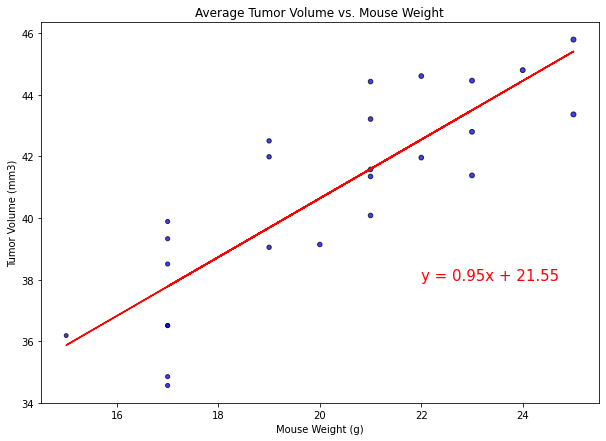

In [56]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value5, y_value5)

regress_values = x_value5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig6, ax6 = plt.subplots(figsize=(10,7))
ax6.scatter(x_value5, y_value5, marker="o", facecolors="blue", edgecolors="black",
            s=x_value5, alpha=0.75)
ax6.annotate(line_eq,(22,38),fontsize=15,color="red")
ax6.plot(x_value5, regress_values, "r-");
ax6.set(
       title="Average Tumor Volume vs. Mouse Weight",
       xlabel="Mouse Weight (g)",
       ylabel="Tumor Volume (mm3)");